In [5]:
from turtle import shape
from tsai.all import *
import pandas as pd
from datenverarbeitung.broken_dataloader import dataloader

num_scenario = 3
dl = dataloader(scenario= num_scenario, path="/Users/adi/Nextcloud/smart_hans/AP2/Daten/headpose_opencv_pitch_roll_yaw_20220904", nr_taps=1, move_window_by=-10, feature_list = ["nosetip_y","nosetip_x","pitch"])
df_n = dl.df

print(" hhhhhhhh ")

cols = list(df_n.columns)
a, b = cols.index('sample_index'), cols.index('feature')
cols[b], cols[a] = cols[a], cols[b]
df_n = df_n[cols]
print(df_n)
df_n = df_n.sort_values(['feature','target'])#.reset_index(drop=True)

smart_hans_08022022_194751_7_250-281_08_gny_.csv
smart_hans_08022022_192131_8_280-310_08_wny_.csv
smart_hans_08022022_190823_13_429-460_08_mny_person_hat_nicht_auf_huf_geschaut.csv
smart_hans_07312022_170216_4_149-178_08_mgy_furz_lachen_am_ende.csv
smart_hans_08022022_182746_7_242-273_08_wny_.csv
smart_hans_08022022_184110_5_176-207_08_mgy_.csv
smart_hans_07312022_185231_4_153-182_08_mny_.csv
smart_hans_07312022_174011_10_330-358_08_mny_.csv
smart_hans_08022022_192219_4_154-184_08_wny_person_hat_nach_12_gewackelt.csv
smart_hans_08022022_191248_9_307-336_08_mny_.csv
smart_hans_08022022_205208_8_276-308_08_wnn_.csv
smart_hans_08022022_191134_12_403-433_08_mny_.csv
smart_hans_08022022_185137_12_400-430_08_mny_.csv
smart_hans_08022022_172713_13_435-465_08_mgn_.csv
smart_hans_08022022_211022_9_314-345_08_mgy_.csv
smart_hans_07312022_164838_8_276-305_08_mgy_klatschen_8_ende.csv
smart_hans_08022022_184808_8_276-305_08_mny_.csv
smart_hans_08022022_195222_3_123-154_08_gny_.csv
smart_hans_080220

0      1.0
1      2.0
2      3.0
3      1.0
4      2.0
      ... 
907    2.0
908    3.0
909    1.0
910    2.0
911    3.0
Name: feature, Length: 912, dtype: float64
0        0.0
1        0.0
2        0.0
3        1.0
4        1.0
       ...  
907    302.0
908    302.0
909    303.0
910    303.0
911    303.0
Name: sample_index, Length: 912, dtype: float64
 hhhhhhhh 
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
shape ours (912, 43)
our X
(304, 3, 40)
[[[0.8633218  0.8633218  0.8633218  ... 0.8633218  0.86418685 0.8633218 ]
  [0.20855214 0.20780195 0.20780195 ... 0.20780195 0.20780195 0.20780195]
  [0.55020668 0.56483283 0.56270901 ... 0.57003907 0.57258939 0.58611675]]

 [[0.8633218  0.86245675 0.86418685 ... 0.86418685 0.86418685 0.8633218 ]
  [0.20705176 0.20705176 0.20780195 ... 0.20630158 0.20630158 0.20555139]
  [0.58924431 0.59575486 0.58626611 ... 0.56910232 0.56711951 0.5646292

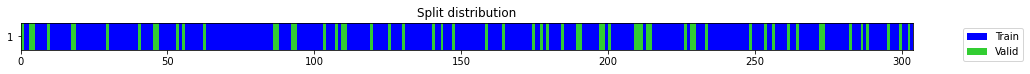

(#304) [(TSTensor(vars:3, len:40, device=cpu, dtype=torch.float32), TensorCategory(0)), (TSTensor(vars:3, len:40, device=cpu, dtype=torch.float32), TensorCategory(1)), (TSTensor(vars:3, len:40, device=cpu, dtype=torch.float32), TensorCategory(0)), (TSTensor(vars:3, len:40, device=cpu, dtype=torch.float32), TensorCategory(1)), (TSTensor(vars:3, len:40, device=cpu, dtype=torch.float32), TensorCategory(0)), (TSTensor(vars:3, len:40, device=cpu, dtype=torch.float32), TensorCategory(1)), (TSTensor(vars:3, len:40, device=cpu, dtype=torch.float32), TensorCategory(0)), (TSTensor(vars:3, len:40, device=cpu, dtype=torch.float32), TensorCategory(1)), (TSTensor(vars:3, len:40, device=cpu, dtype=torch.float32), TensorCategory(0)), (TSTensor(vars:3, len:40, device=cpu, dtype=torch.float32), TensorCategory(1))] ...]


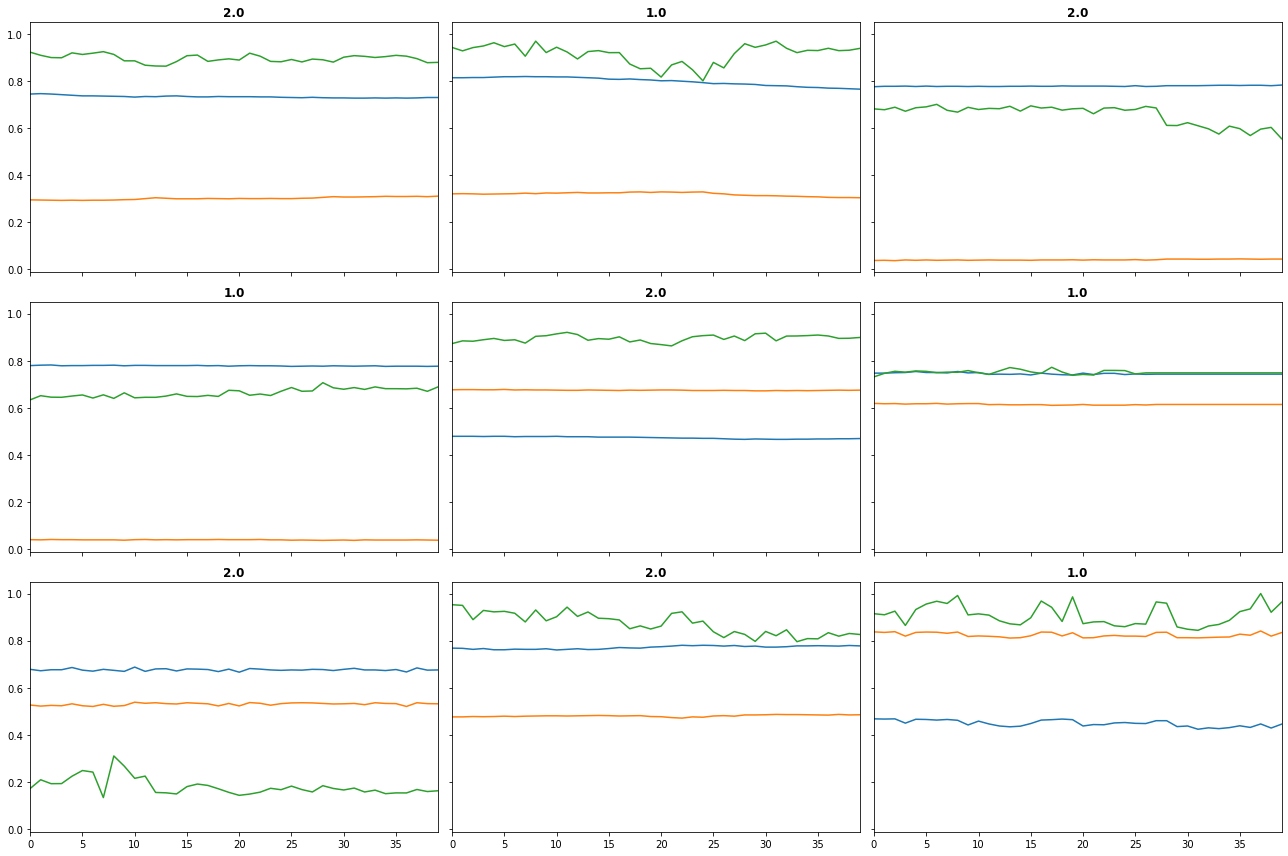

In [40]:
print(df_n["feature"])
print(df_n['sample_index'])
print(" hhhhhhhh ")

X, old_y, names = df2xy (df_n, sample_col='sample_index', feat_col='feature', target_col='target', data_cols=None, steps_in_rows=True, return_names=True)

print(names)
print(f"shape ours {df_n.shape}")

print("our X")
print(X.shape)
print(X)

print("our y")
print(old_y)
print(old_y.shape)

y = np.empty(len(old_y))
for i, elem in enumerate(old_y):
    for number in elem:
            remainder = number % 10
            y[i] = remainder

print(y)
print(y.shape)
   

#print(" hhhhhhhh ")
splits = get_splits(y, valid_size=.2)
splits

tfms  = [None, TSRegression()]
#dsets = TSDatasets(X,  splits=splits, inplace=True)
dsets = TSDatasets( X,y,  inplace=True, splits=splits, tfms=[None, TSClassification()])

print(dsets)


dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, num_workers=0, tfms=[None, TSClassification()], item_tfs=TSClassification())
b = dls.one_batch()
#x, y = b
#print(x.size(), y.size())
#print(x.size())
dls.show_batch(sharey=True)



x_ucr
[[-0.372758 -0.367844 -0.378445 ... -0.537007 -0.475939 -0.479505]
 [-1.821679 -1.841987 -1.821358 ... -1.751323 -1.772353 -1.761632]
 [-0.846321 -0.846325 -0.839571 ... -0.60374  -0.763048 -0.793202]
 ...
 [ 0.619205  0.617045  0.624789 ...  0.541325  0.559272  0.571569]
 [-1.771773 -1.79666  -1.738568 ... -1.691657 -1.683121 -1.721661]
 [-0.810086 -0.818863 -0.78806  ... -0.716364 -0.757526 -0.741532]]
(51,)
ucr y
['4.0' '3.0' '3.0' '4.0' '3.0' '5.0' '1.0' '6.0' '3.0' '2.0' '6.0' '1.0'
 '4.0' '6.0' '3.0' '2.0' '3.0' '2.0' '2.0' '6.0' '4.0' '3.0' '5.0' '4.0'
 '1.0' '6.0' '3.0' '5.0' '5.0' '5.0' '3.0' '5.0' '3.0' '5.0' '4.0' '5.0'
 '3.0' '1.0' '4.0' '6.0' '3.0' '4.0' '4.0' '6.0' '1.0' '6.0' '2.0' '1.0'
 '1.0' '6.0' '4.0' '1.0' '3.0' '3.0' '2.0' '1.0' '5.0' '1.0' '2.0' '5.0'
 '4.0' '5.0' '2.0' '5.0' '1.0' '6.0' '3.0' '1.0' '2.0' '1.0' '3.0' '4.0'
 '4.0' '3.0' '5.0' '2.0' '2.0' '3.0' '3.0' '6.0' '6.0' '1.0' '2.0' '5.0'
 '2.0' '2.0' '4.0' '5.0' '6.0' '4.0' '2.0' '3.0' '1.0' '3.0' '1

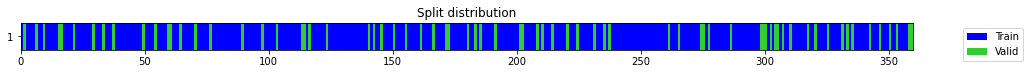

TypeError: __init__() got an unexpected keyword argument 'item_tfs'

In [26]:
!CUDA_LAUNCH_BLOCKING=1

from turtle import shape
from tsai.all import *
import pandas as pd
from datenverarbeitung.dataloader import dataloader

# X_ucr = X_ucr[:, 0]
# y_ucr = y_ucr.reshape(-1, 1)
# data = np.concatenate((X_ucr, y_ucr), axis=-1)
# df = pd.DataFrame(data).astype(float)
# df = df.rename(columns={570: 'target'})
# df1 = pd.concat([df, df + 10, df + 100], axis=0).reset_index(drop=False)
# df2 = pd.DataFrame(np.array([1] * 60 + [2] * 60 + [3] * 60), columns=['feature'])
# df = pd.merge(df2, df1, left_index=True, right_index=True)
# df




# X_ucr, y_ucr = df2xy(df, sample_col='index', feat_col='feature', target_col='target', data_cols=None)

# print(f"shape ucr {df.shape}")
ds_name = 'NATOPS'
X_ucr, y_ucr, _ = get_UCR_data(ds_name, return_split=False)

print("x_ucr")
print(X_ucr[0])
print(X_ucr[0][0].shape)

print("ucr y")
print(y_ucr)
print(y_ucr.shape)

splits_ucr = get_splits(y_ucr, valid_size=.2)
splits_ucr


dsets_ucr = TSDatasets(X_ucr,y_ucr, tfms=[None, TSClassification()], inplace=True, splits=splits_ucr)

print(dsets_ucr)


dls_ucr = TSDataLoaders.from_dsets(dsets_ucr.train, dsets_ucr.valid,bs=[6,6], num_workers=0)

dls_ucr.show_batch(sharey=True)

In [31]:
b  = dls_ucr.one_batch()
x_ucr_debug, y_ucr_debug = b
print(x_ucr_debug.size(), y_ucr_debug.size())

scenario_name_stage0 = "UCR_multivar_scenario_{}_{}_stage0".format("UCR", "InceptionTimePlus")
print(dls_ucr.vars)
print(dls_ucr.c)
model_ucr = InceptionTimePlus(dls_ucr.vars, dls_ucr.c)
learn = Learner(dls_ucr, model_ucr)
learn.save(scenario_name_stage0)

torch.Size([6, 6, 17984]) torch.Size([6])
6
5


Path('models/UCR_multivar_scenario_UCR_InceptionTimePlus_stage0.pth')

In [41]:
# b  = dls.one_batch()
# x_debug, y_debug = b
# print(x_debug.size(), y_debug.size())

scenario_name_stage0 = "UCR_multivar_scenario_{}_{}_stage0".format(num_scenario, "InceptionTimePlus")
print(dls.vars)
print(dls.c)
model = InceptionTimePlus(dls.vars, dls.c)
learn = Learner(dls, model)
learn.save(scenario_name_stage0)

3
2


Path('models/UCR_multivar_scenario_3_InceptionTimePlus_stage0.pth')

In [42]:
scenario_name_stage0 = "multivar_scenario_{}_{}_stage0".format("UCR", "InceptionTimePlus")
print(dls_ucr.vars)
print(dls_ucr.c)
model = InceptionTimePlus(6,5)
learn = Learner(dls_ucr, model)
learn.save(scenario_name_stage0)

NameError: name 'dls_ucr' is not defined

In [43]:
scenario_name_stage0 = "multivar_scenario_{}_{}_stage0".format(num_scenario, "InceptionTimePlus")
print(dls.vars)
print(dls.c)
model = InceptionTimePlus(dls.vars,dls.c)
learn = Learner(dls, model)
learn.save(scenario_name_stage0)

3
2


Path('models/multivar_scenario_3_InceptionTimePlus_stage0.pth')

done


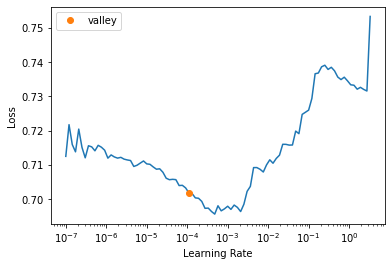

In [44]:
learn.load(scenario_name_stage0)
"y not being batched correctly? https://forums.fast.ai/t/input-training-batch-size-error-for-multi-class-classification-with-custom-dataset/85220/2"
learn.lr_find()
print("done")

In [45]:
scenario_name_stage1 = scenario_name_stage0.replace("0","1")
learn.fit_one_cycle(100, lr_max=1e-3)
learn.save(scenario_name_stage1)

epoch,train_loss,valid_loss,time
0,0.734001,0.695423,00:00
1,0.713274,0.694399,00:00
2,0.708685,0.694840,00:00
3,0.701866,0.696302,00:00
4,0.698750,0.697980,00:00
5,0.696937,0.700392,00:00
6,0.695001,0.704552,00:00
7,0.693544,0.711173,00:00
8,0.692133,0.721718,00:00
9,0.690566,0.734790,00:00


Path('models/multivar_scenario_3_InceptionTimePlus_stage1.pth')

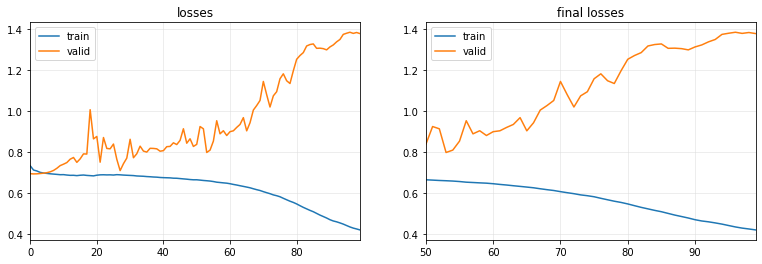

In [46]:
learn.recorder.plot_metrics()

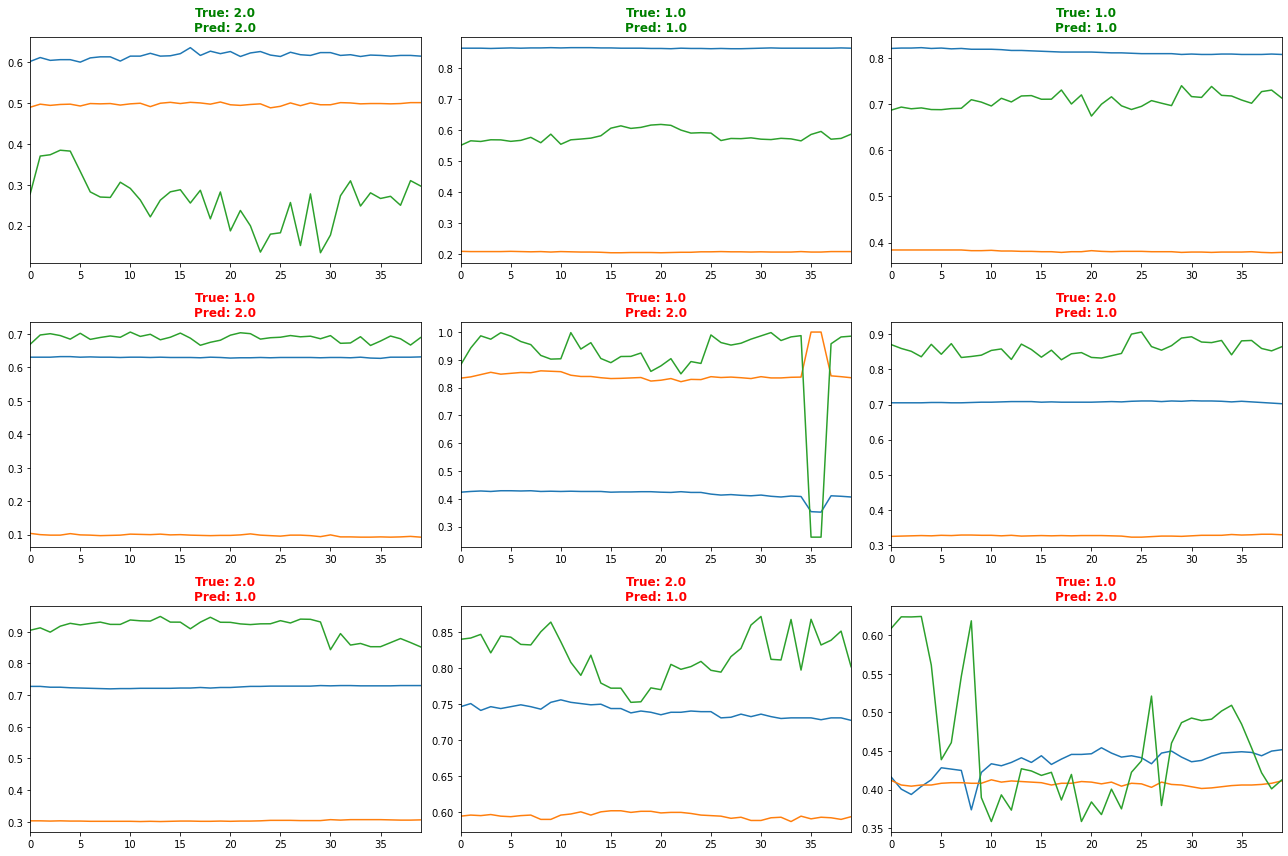

In [47]:
learn.show_results()

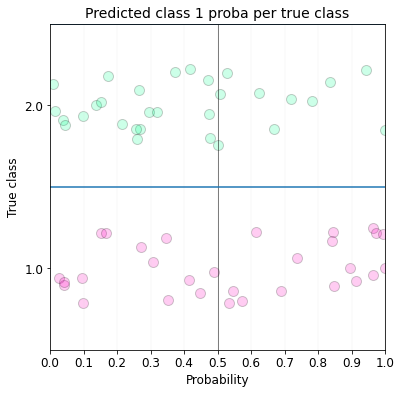

In [48]:
learn.show_probas()
#was sagt probability aus? accuracy vs probability?

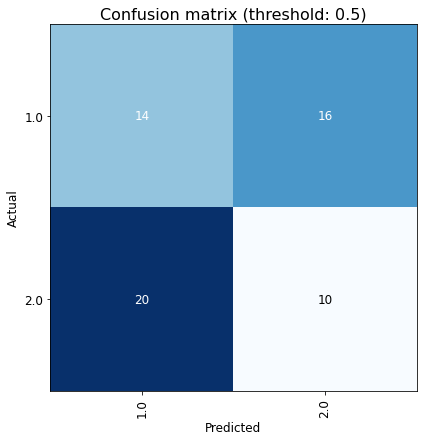

In [49]:
learn.plot_confusion_matrix()

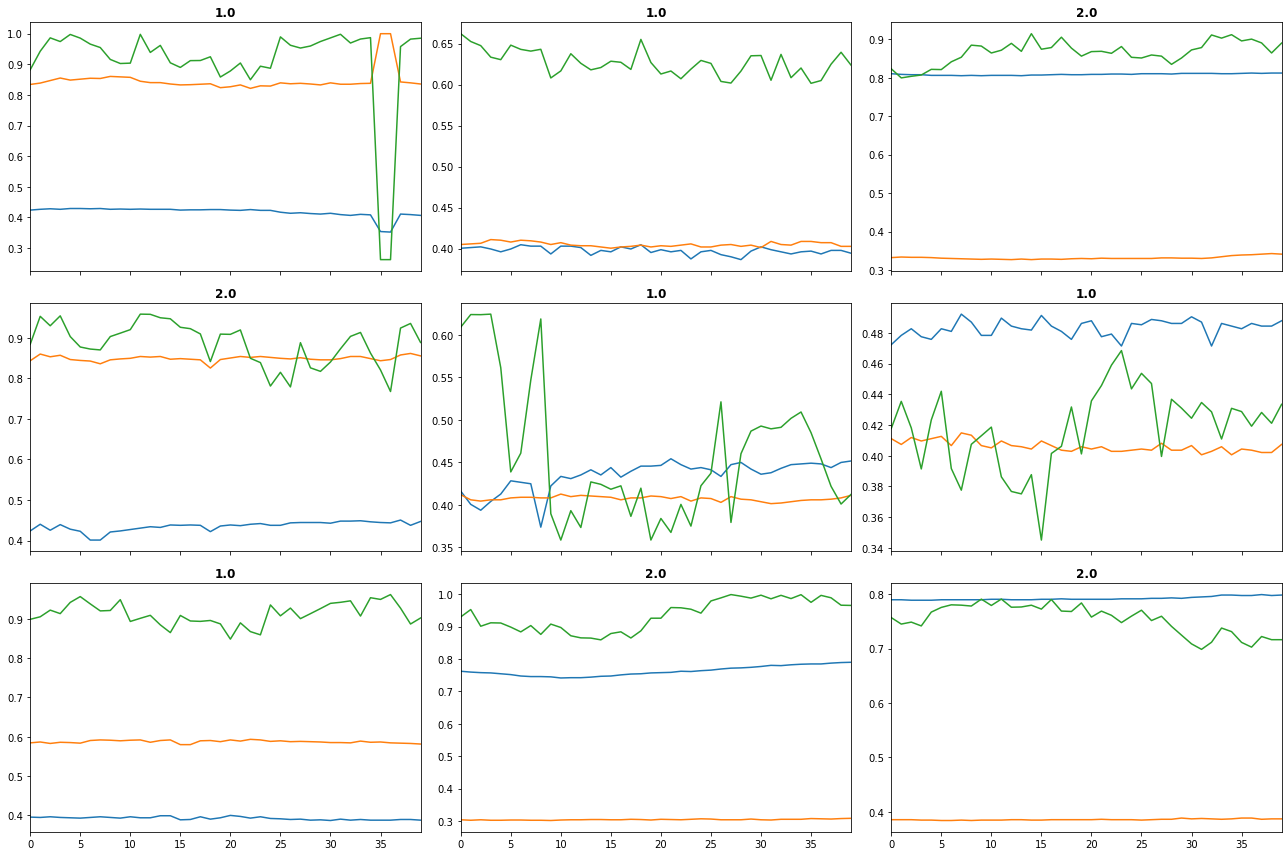

In [50]:
learn.plot_top_losses(X[splits[1]], y[splits[1]], largest=True)